# Movie Recommender System - Part 1

In [1]:
#import packages
%matplotlib inline
import IPython
import pandas as pd
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')


In [2]:
df = pd.read_csv("movies_metadata.csv")
df.head(5).transpose()

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [3]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [4]:
df.shape


(45466, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
#data wrangling
df = df.drop(['imdb_id'], axis = 1)
df 


,adult,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   original_language      45455 non-null  object 
 7   original_title         45466 non-null  object 
 8   overview               44512 non-null  object 
 9   popularity             45461 non-null  object 
 10  poster_path            45080 non-null  object 
 11  production_companies   45463 non-null  object 
 12  production_countries   45463 non-null  object 
 13  release_date           45379 non-null  object 
 14  revenue                45460 non-null  float64
 15  ru

In [8]:
df[df['original_title'] != df['title']] [['title','original_title']]


,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal
...,...,...
45453,Mom,Maa
45455,St. Michael Had a Rooster,San Michele aveva un gallo
45461,Subdue,رگ خواب
45462,Century of Birthing,Siglo ng Pagluluwal


In [9]:
df = df.drop(['original_title'], axis=1)

In [10]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,45456,45457,45458,45459,45460,45461,45462,45463,45464,45465
adult,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,NaN,NaN,NaN,"{'id': 645, 'name': 'James Bond Collection', '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,30000000,65000000,0,16000000,0,60000000,58000000,0,35000000,58000000,...,0,0,0,0,0,0,0,0,0,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",...,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...","[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...","[{'id': 27, 'name': 'Horror'}]","[{'id': 878, 'name': 'Science Fiction'}]","[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...","[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...","[{'id': 18, 'name': 'Drama'}]","[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",[],[]
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.mgm.com/view/movie/757/Goldeneye/,...,NaN,NaN,NaN,NaN,NaN,http://www.imdb.com/title/tt6209470/,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862,949,11860,45325,9091,710,...,84419,390959,289923,222848,30840,439050,111109,67758,227506,461257
original_language,en,en,en,en,en,en,en,en,en,en,...,en,en,en,en,en,fa,tl,en,en,en
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...,"Obsessive master thief, Neil McCauley leads a ...",An ugly duckling having undergone a remarkable...,"A mischievous young boy, Tom Sawyer, witnesses...",International action superstar Jean Claude Van...,James Bond must unmask the mysterious head of ...,...,An unsuccessful sculptor saves a madman named ...,"In this true-crime documentary, we delve into ...",A film archivist revisits the story of Rustin ...,It's the year 3000 AD. The world's most danger...,"Yet another version of the classic epic, with ...",Rising and falling between a man and woman.,An artist struggles to finish his work while a...,"When one of her hits goes wrong, a professiona...","In a small town live two brothers, one a minis...",50 years after decriminalisation of homosexual...
popularity,21.9469,17.0155,11.7129,3.85949,8.38752,17.9249,6.67728,2.56116,5.23158,14.686,...,0.222814,0.076061,0.38645,0.661558,5.683753,0.072051,0.178241,0.903007,0.003503,0.163015
poster_path,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,/e64sOI48hQXyru7naBFyssKFxVd.jpg,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,/jQh15y5YB7bWz1NtffNZmRw0s9D.jpg,/sGO5Qa55p7wTu7FJcX4H4xIVKvS.jpg,/eoWvKD60lT95Ss1MYNgVExpo5iU.jpg,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,...,/yMnq9mL5uYxbRgwKqyz1cVGCJYJ.jpg,/q75tCM4pFmUzdCg0gqcOQquCaYf.jpg,/lXtoHVdej6kS1Dc7KAhw05sMos9.jpg,/4lF9LH0b0Z1X94xGK9IOzqEW6k1.jpg,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,/s5UkZt6NTsrS7ZF0Rh8nzupRlIU.jpg


In [11]:
df[df['revenue'] == 0].shape

(38052, 22)

In [12]:
df['revenue'] = df['revenue'].replace(0, np.nan)
# we have kept revenue as an important feature

In [13]:
df['budget'] = pd.to_numeric(df['budget'], errors = 'coerce')
df['budget']= df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(36576, 22)

In [14]:
df['return'] = df['revenue']/df['budget']
df[df['return'].isnull()].shape

(40085, 23)

In [15]:
df['year']  = pd.to_datetime(df['release_date'], errors = 'coerce').apply(lambda x:str(x).split('-')[0] if x != np.nan else np.nan)
df

,adult,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.090760,1995
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,fa,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,...,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaN,NaT
45462,False,NaN,NaN,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tl,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,NaN,2011
45463,False,NaN,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,NaN,2003
45464,False,NaN,NaN,[],NaN,227506,en,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,...,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,NaN,1917


In [16]:
df['adult'].value_counts()
df = df.drop('adult',axis =1)

In [17]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df['poster_path'] = "<img src='" + base_poster_url + df['poster_path'] + "' style='height:100px;'>"

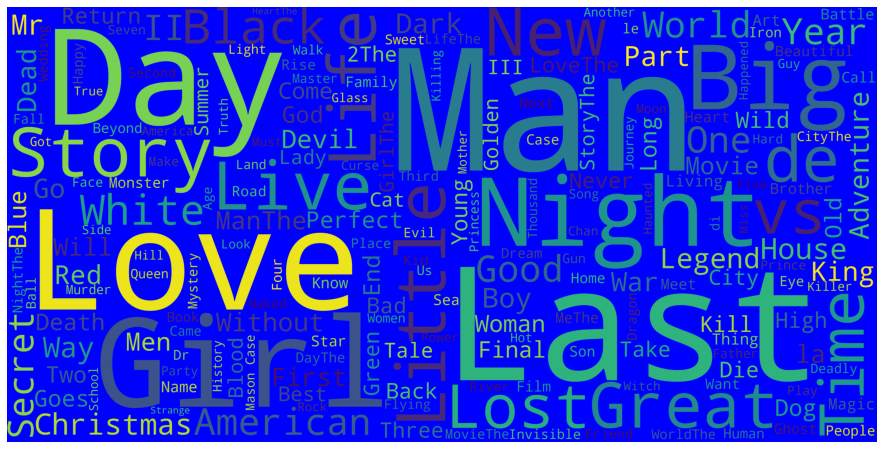

In [18]:
#lets start with some exploratory data analysis
from wordcloud import WordCloud, STOPWORDS

df['title'] =df["title"].astype('str')
df['overview'] = df['overview'].astype('str')
#create a corpus for the word clouds
title_corpus = ''.join(df['title'])
overview_corpus = ''.join(df['overview'])
#generate aa word cloud for title_corpus
title_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'blue', width = 4000, height = 2000).generate(title_corpus)
plt.figure(figsize = (16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

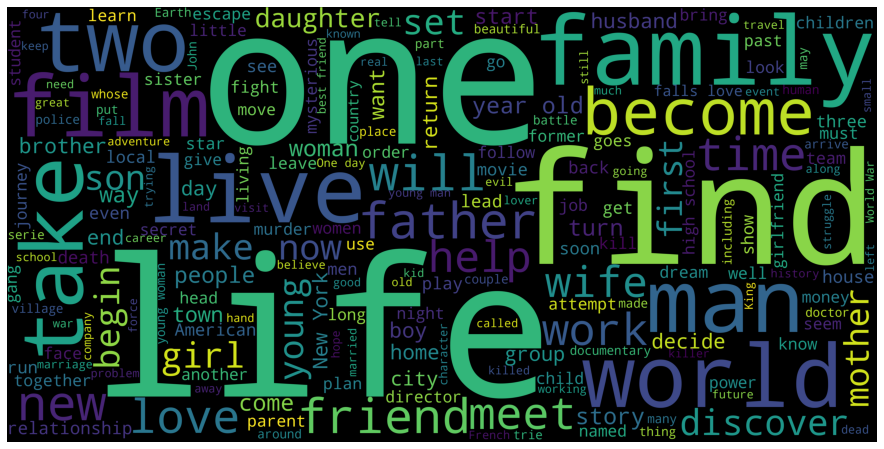

In [19]:
overview_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 4000, height = 2000).generate(overview_corpus)
plt.figure(figsize = (16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

In [20]:
#which countries has the highest number of production 
import ast
df['production_countries'] = df['production_countries'].fillna("[]").apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])

In [21]:
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level =1, drop = True)
s.name = 'countries'

In [22]:
#determine which locations had been popular for the production
con_df = df.drop('production_countries', axis = 1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies_prod', 'country']
con_df = con_df.reset_index().drop('index' , axis = 1)
con_df

,num_movies_prod,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
...,...,...
155,1,Myanmar
156,1,Barbados
157,1,Netherlands Antilles
158,1,Somalia


In [23]:
#consider a dataframe without united states of America
con_df=con_df[con_df['country'] != 'United States of America']

In [24]:
data = [dict(
        type = 'choropleth',
        locations = con_df ['country'],
        locationmode = 'country names',
        z = con_df['num_movies_prod'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(line = dict(color = 'rgb(180, 180, 180)', width = 0.5)),
        colorbar = dict(autotick = False, tickprefix = '', title = 'Production Countries')
       )]

layout = dict(title = 'Production Countries for the MovieLens Movies (Apart from US)',
              geo = dict(showframe = False,
                         showcoastlines = False,
                         projection = dict(type = 'Mercator')
                        )
             )

fig = dict(data = data, layout = layout)
py.iplot(fig, validate = False, filename = 'd3-world-map')

In [25]:
#franchise
#Find the most successful franchise
df_fran = df[df["belongs_to_collection"].notnull()]
df_fran["belongs_to_collection"] = df_fran["belongs_to_collection"].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance (x, dict) else np.nan)
df_fran = df_fran[df_fran["belongs_to_collection"].notnull()]

In [26]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc = {'revenue': ['mean', 'sum', 'count']}).reset_index()


In [27]:
#highest grossing movie franchises
fran_pivot.sort_values('sum', ascending = False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


In [28]:
#most successful franchise (by average gross)
fran_pivot.sort_values('mean', ascending = False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


In [29]:
#Longest Running Franchise
fran_pivot.sort_values('count', ascending = False).head(10)

,belongs_to_collection,count,mean,sum
646,James Bond Collection,26,2.733450e+08,7.106970e+09
473,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
976,Pokémon Collection,11,6.348189e+07,6.983008e+08
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
540,Halloween Collection,8,3.089601e+07,2.471681e+08
29,A Nightmare on Elm Street Collection,8,4.544894e+07,3.635916e+08
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
1432,The Pink Panther (Original) Collection,8,2.055978e+07,1.644782e+08
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
977,Police Academy Collection,7,4.352046e+07,3.046432e+08


In [30]:
#Production Companies
df["production_companies"] = df["production_companies"].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i["name"] for i in x] if isinstance (x, list) else []) 
s = df.apply(lambda x: pd.Series(x['production_companies']), axis = 1).stack().reset_index(level =1, drop = True)
s.name = 'companies'

In [31]:
com_df = df.drop("production_companies", axis = 1).join(s)
com_sum = pd.DataFrame(com_df.groupby("companies")["revenue"].sum().sort_values(ascending = False))
com_sum.columns = ['Total']
com_avg = pd.DataFrame(com_df.groupby("companies")["revenue"].mean().sort_values(ascending = False))
com_avg.columns = ['Average']
com_num = pd.DataFrame(com_df.groupby("companies")["revenue"].count().sort_values(ascending = False))
com_num.columns = ['Number']

com_pivot = pd.concat((com_sum,com_avg,com_num), axis = 1)

In [32]:
#Highest grossing production companies
com_pivot.sort_values('Total', ascending = False).head(10)

,Total,Average,Number
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78
Dune Entertainment,1.500379e+10,2.419966e+08,62


In [33]:
#Most successful production companies
com_pivot[com_pivot["Number"] >=15].sort_values("Average", ascending= False).head(10)

,Total,Average,Number
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
DC Entertainment,6.212609e+09,3.882880e+08,16
Dentsu,6.853205e+09,3.807336e+08,18
Jerry Bruckheimer Films,8.957441e+09,3.732267e+08,24
Marvel Enterprises,6.538067e+09,3.441088e+08,19
Legendary Pictures,1.346866e+10,3.367166e+08,40


In [34]:
#Original Language
df["original_language"].drop_duplicates().shape[0]

lang_df = pd.DataFrame(df["original_language"].value_counts())
lang_df["language"] = lang_df.index
lang_df.columns = ["number", "language"]
lang_df.head()

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


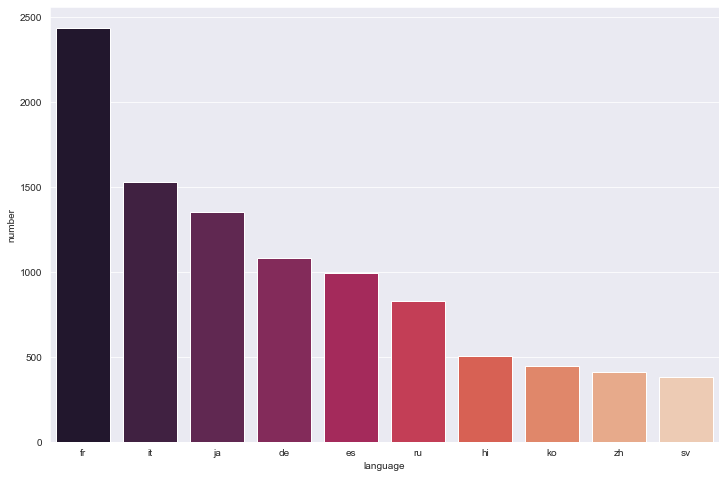

In [35]:
#plot figure
plt.figure(figsize=(12,8))
sns.barplot(x="language", y="number", data=lang_df.iloc[1:11],palette='rocket')
plt.show()


In [36]:
#Lets work with the popularity, vote average, vote count 
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan 

In [37]:
df["popularity"] = df["popularity"].apply(clean_numeric).astype('float')
df["vote_average"] = df["vote_average"].apply(clean_numeric).astype('float')
df["vote_count"] = df["vote_count"].apply(clean_numeric).astype('float')


In [38]:
#find the distribution of all above three features
df["popularity"].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

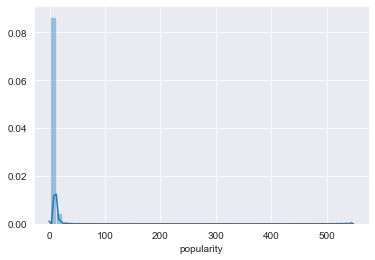

In [39]:
sns.distplot(df["popularity"].fillna(df["popularity"].median()))
plt.show()

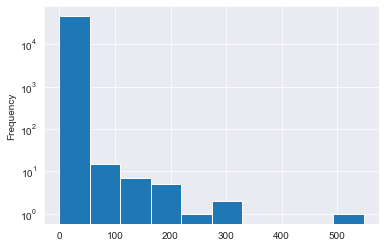

In [40]:
df["popularity"].plot(logy=True, kind = 'hist')

In [41]:
#Find most popular movies by popularity score
df[['title','popularity','year']].sort_values("popularity",ascending=False).head(10)


,title,popularity,year
30700,Minions,547.488298,2015
33356,Wonder Woman,294.337037,2017
42222,Beauty and the Beast,287.253654,2017
43644,Baby Driver,228.032744,2017
24455,Big Hero 6,213.849907,2014
26564,Deadpool,187.860492,2016
26566,Guardians of the Galaxy Vol. 2,185.330992,2017
14551,Avatar,185.070892,2009
24351,John Wick,183.870374,2014
23675,Gone Girl,154.801009,2014


In [42]:
#examine feature vote_counts
df["vote_count"].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

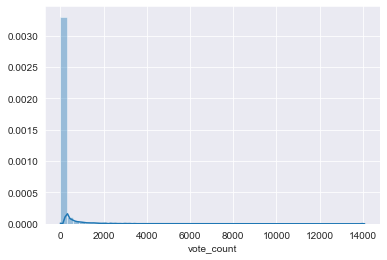

In [43]:
sns.distplot(df["vote_count"].fillna(df["vote_count"].median()))

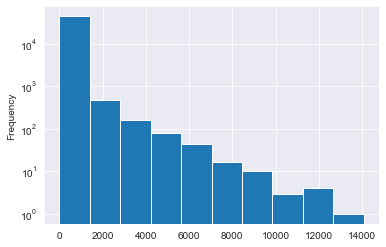

In [44]:
df["vote_count"].plot(logy = True, kind = "hist")

In [45]:
df[['title','vote_count','year']].sort_values("vote_count", ascending = False).head(10)

,title,vote_count,year
15480,Inception,14075.0,2010
12481,The Dark Knight,12269.0,2008
14551,Avatar,12114.0,2009
17818,The Avengers,12000.0,2012
26564,Deadpool,11444.0,2016
22879,Interstellar,11187.0,2014
20051,Django Unchained,10297.0,2012
23753,Guardians of the Galaxy,10014.0,2014
2843,Fight Club,9678.0,1999
18244,The Hunger Games,9634.0,2012


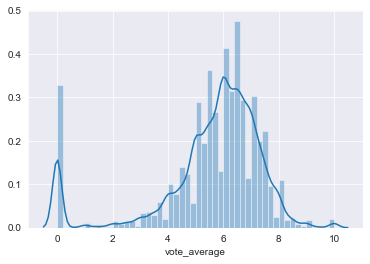

In [46]:
#vote_average
sns.distplot(df["vote_average"].fillna(df["vote_average"].median()))

In [47]:
df["vote_average"].describe()

count    45460.000000
mean         5.618207
std          1.924216
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

In [48]:
df[df["vote_count"]>2000][['title','vote_average','vote_count','year']].sort_values("vote_average", ascending = False).head(10)

,title,vote_average,vote_count,year
314,The Shawshank Redemption,8.5,8358.0,1994
834,The Godfather,8.5,6024.0,1972
2211,Life Is Beautiful,8.3,3643.0,1997
5481,Spirited Away,8.3,3968.0,2001
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0,1975
1176,Psycho,8.3,2405.0,1960
2843,Fight Club,8.3,9678.0,1999
1178,The Godfather: Part II,8.3,3418.0,1974
12481,The Dark Knight,8.3,12269.0,2008
292,Pulp Fiction,8.3,8670.0,1994


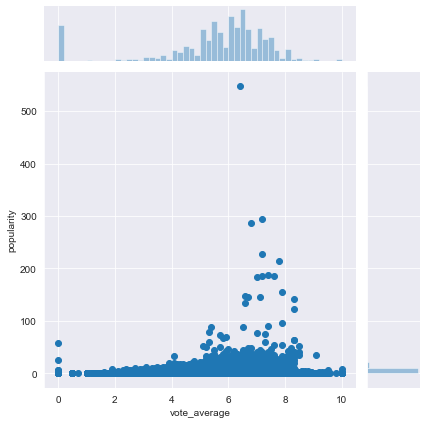

In [49]:
#identify whether there are any strong relationships existing between these 3 features
sns.jointplot(x='vote_average',y='popularity',data=df)

In [50]:
pearsoncorr=df[["popularity","vote_average","vote_count"]].corr(method='pearson')
pearsoncorr

,popularity,vote_average,vote_count
popularity,1.000000,0.154399,0.559965
vote_average,0.154399,1.000000,0.123607
vote_count,0.559965,0.123607,1.000000


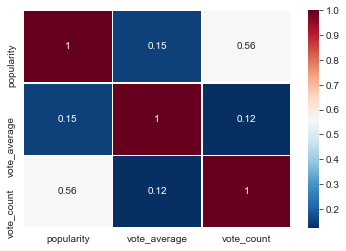

In [51]:
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [52]:
#relation between vote_average with vote_count and popularity score is independent. More vote count doesn't mean that the voting average would be good.

In [53]:
#Movie Release Dates
#get the months and dates from the column release_date

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec']
day_order = ['monday','tuesday','wednesday','thursday', 'friday','saturday','sunday']

In [54]:
#def functions

def get_month(x):
    try:
         return month_order[int(str(x).split('-')[1])-1]
    except:
         return np.nan

In [55]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [56]:
df['day']=df['release_date'].apply(get_day)
df['month']=df['release_date'].apply(get_month)

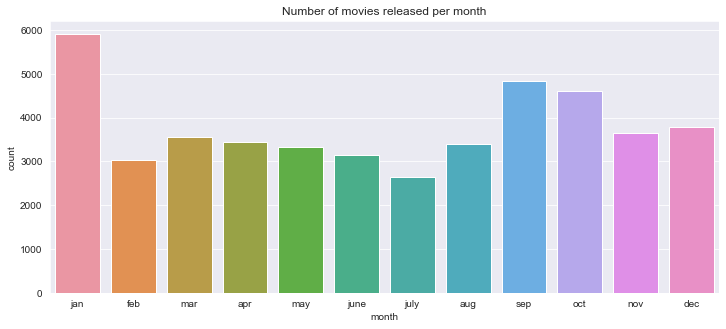

In [57]:
#plot how many movies gets released per month. 
plt.figure(figsize=(12,5))
sns.countplot(x="month",data=df,order=month_order)
plt.title('Number of movies released per month')
plt.show()

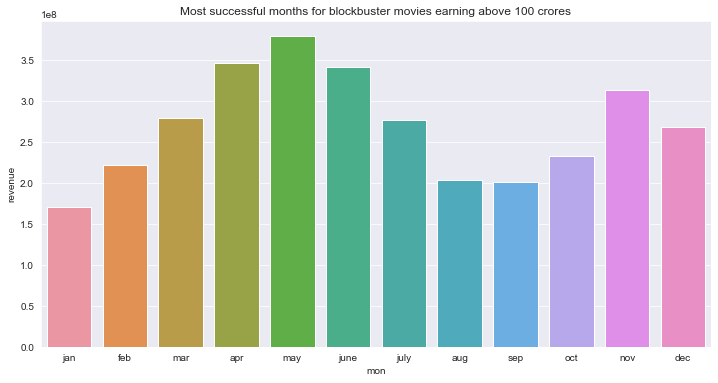

In [58]:
#which months are successful for blockbuster movies
month_mean = pd.DataFrame(df[df['revenue']> 1e8].groupby('month')['revenue'].mean())
month_mean['mon']= month_mean.index
plt.figure(figsize=(12,6))
plt.title("Most successful months for blockbuster movies earning above 100 crores")
sns.barplot(x='mon',y='revenue',data=month_mean,order=month_order)

(0.0, 12.0)

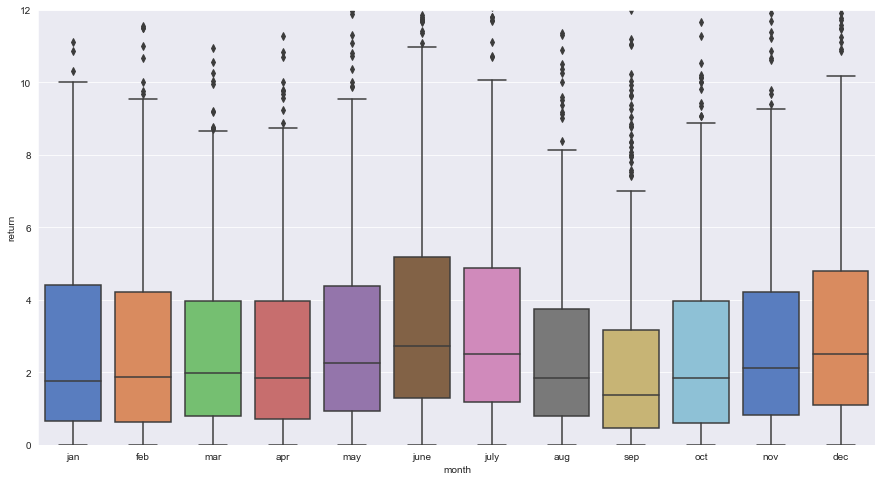

In [59]:
#lets analyse return of investment per month for the successful movies.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize =(15, 8))
sns.boxplot(x='month', y='return', data=df[df['return'].notnull()], palette="muted", ax=ax, order=month_order)
ax.set_ylim([0,12])


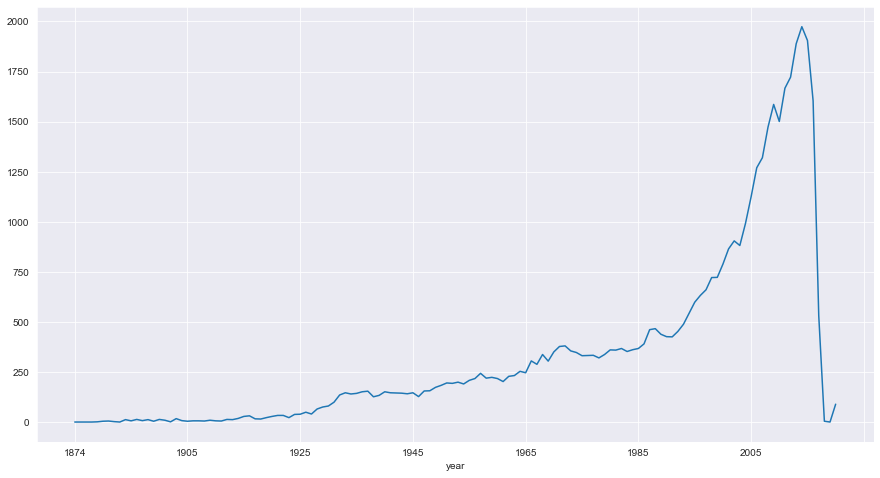

In [60]:
#number of movies by year
year_count = df.groupby('year')['title'].count()
plt.figure(figsize=(15,8))
year_count.plot()

In [61]:
earliest_movies = df[df['year'] !='NaT'][['title', 'year']].sort_values('year').head(15)
earliest_movies

,title,year
34940,Passage of Venus,1874
34937,Sallie Gardner at a Gallop,1878
41602,Buffalo Running,1883
34933,Man Walking Around a Corner,1887
34934,Accordion Player,1888
34938,Traffic Crossing Leeds Bridge,1888
34936,"Monkeyshines, No. 2",1890
34939,London's Trafalgar Square,1890
34935,"Monkeyshines, No. 1",1890
41194,Mosquinha,1890


In [62]:
#lets see the performance of movies in this century month wise. This would help us to understand which months across the decades are most favorable for movie releases

In [63]:
months = { 'jan' : 1, "feb": 2, "mar": 3, 'apr': 4, 'may':5, 'june': 6, "july": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov":11,
         'dec': 12}

In [64]:
df_hmap = df.copy()
df_hmap["year"] = df_hmap[df_hmap["year"] != 'NaT']["year"].astype(int)
df_hmap = df_hmap[df_hmap['year'] >= 2000]
hmap = pd.pivot_table(data=df_hmap, index = "month", columns = "year", aggfunc = "count", values = 'title')
hmap = hmap.fillna(0)

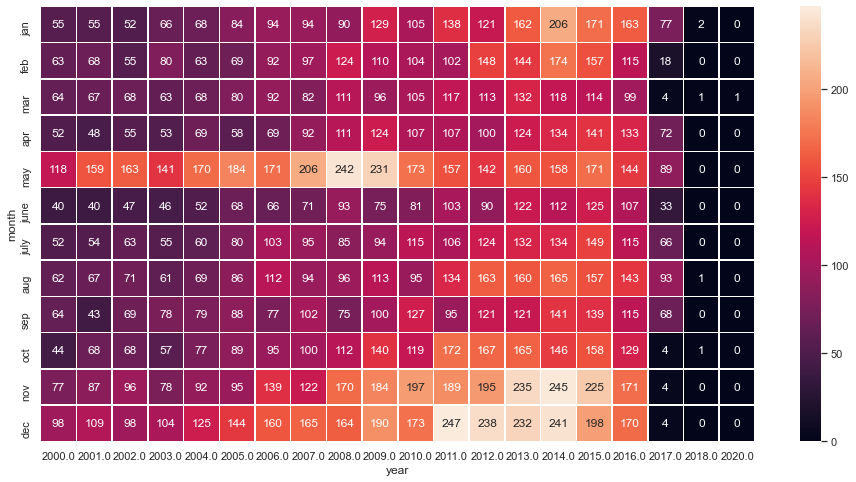

In [65]:
sns.set(font_scale = 1)
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(hmap, annot = True, linewidths = 0.5, ax =ax, fmt = "n", yticklabels=month_order)

In [66]:
df["status"].value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

In [67]:
#number of langauages spoken in each film counts
df['spoken_languages']=df["spoken_languages"].fillna('[]').apply(ast.literal_eval).apply(lambda x: len(x) if isinstance(x,list) else np.nan)

In [68]:
df["spoken_languages"].value_counts()

1     33736
2      5371
0      3835
3      1705
4       550
5       178
6        62
7        14
8         6
9         5
19        1
13        1
12        1
10        1
Name: spoken_languages, dtype: int64

In [69]:
df[df["spoken_languages"]>=10][["title", "spoken_languages", "year"]].sort_values("spoken_languages", ascending = False)

,title,spoken_languages,year
22235,Visions of Europe,19,2004
35288,The Testaments,13,2000
14093,To Each His Own Cinema,12,2007
8789,The Adventures of Picasso,10,1978


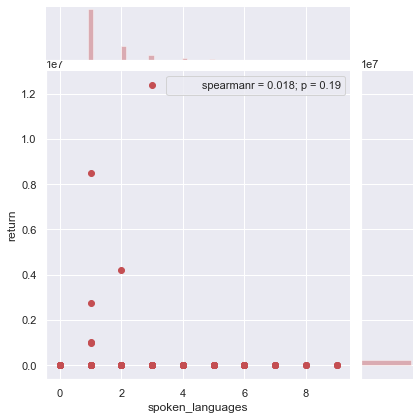

In [70]:
from scipy import stats
sns.jointplot(data=df, x="spoken_languages", y="return", stat_func = stats.spearmanr, color = 'r')

In [71]:
#runtime
df["runtime"].describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

In [72]:
df["runtime"] = df["runtime"].astype(float)

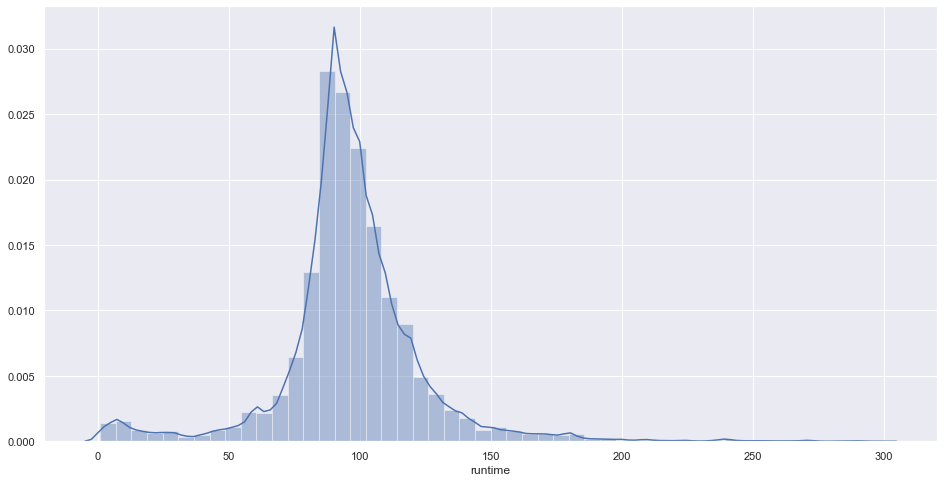

In [73]:
plt.figure(figsize=(16,8))
sns.distplot(df[(df["runtime"]<300) & (df["runtime"]>0)]["runtime"])

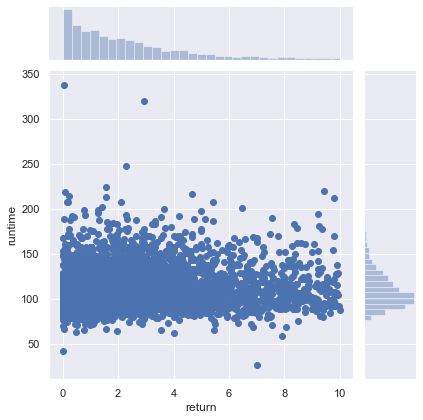

In [74]:
#find if there is any relationship between runtime and return
df_ret = df[(df["return"].notnull()) & (df["runtime"]>0) & (df["return"]<10)]
sns.jointplot("return", "runtime", data = df_ret )
plt.show()

In [75]:
pearsoncorr=df[["return","runtime"]].corr(method='pearson')
pearsoncorr

,return,runtime
return,1.000000,-0.013734
runtime,-0.013734,1.000000


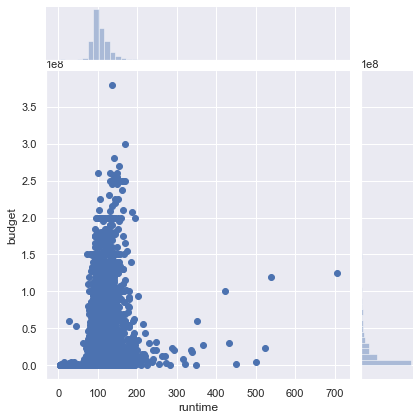

In [76]:
#find relationship between duration and budget
df_budget = df[(df["budget"].notnull()) & (df["runtime"]>0)]
sns.jointplot(data=df_budget, x="runtime", y="budget")
plt.show()

In [77]:
pearsoncorr=df[["budget","runtime"]].corr(method='pearson')
pearsoncorr

,budget,runtime
budget,1.000000,0.223296
runtime,0.223296,1.000000


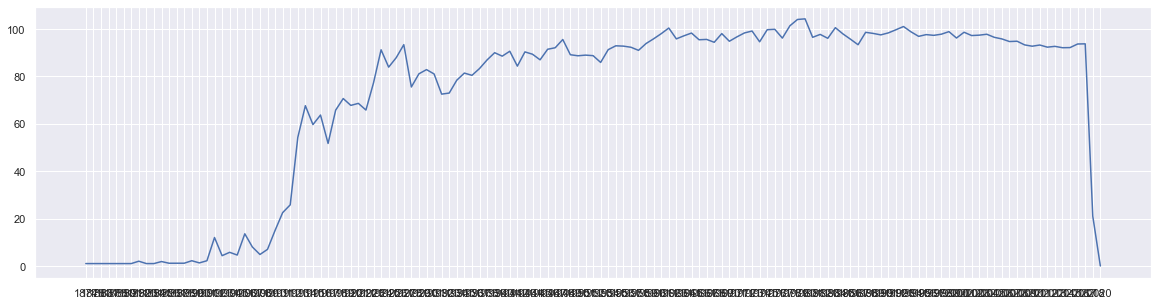

In [78]:
plt.figure(figsize=(20,5))
year_runtime = df[df['year'] != 'NaT'].groupby('year')['runtime'].mean()
plt.plot(year_runtime.index, year_runtime)
plt.show()

In [79]:
#view largest and shortest movies

df[df["runtime"] > 0][["title", "runtime", "year"]].sort_values("runtime").head(10)

,title,runtime,year
35146,La Vague,1.0,1891
36577,Champs de Mars,1.0,1900
36576,Palace of Electricity,1.0,1900
44965,"Luis Martinetti, Contortionist",1.0,1894
42357,A Gathering of Cats,1.0,2007
36575,Eiffel Tower from Trocadero Palace,1.0,1900
36574,Panorama of Eiffel Tower,1.0,1900
44714,The Infernal Caldron,1.0,1903
19244,The Kiss,1.0,1896
44646,The Vanishing Lady,1.0,1896


In [80]:
df[df["runtime"] > 0][["title", "runtime", "year"]].sort_values("runtime", ascending = False).head(10)

,title,runtime,year
24178,Centennial,1256.0,1978
40938,Baseball,1140.0,1994
19965,Jazz,1140.0,2001
13767,Berlin Alexanderplatz,931.0,1980
13953,Heimat: A Chronicle of Germany,925.0,1984
27855,The Story of Film: An Odyssey,900.0,2011
26682,Taken,877.0,2002
19158,The War,874.0,2007
34667,The Roosevelts: An Intimate History,840.0,2014
34732,Seventeen Moments in Spring,840.0,1973


In [81]:
df["budget"].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

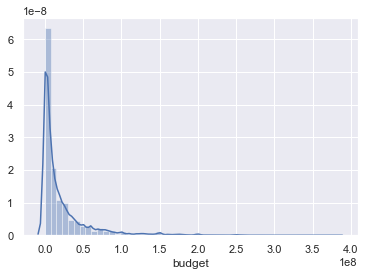

In [82]:
sns.distplot(df[df["budget"].notnull()]["budget"])
plt.show()

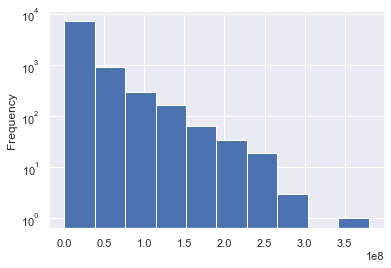

In [83]:
df["budget"].plot(logy=True, kind='hist')

In [84]:
#most expensive movies of all time
df[df["budget"].notnull()][["title", "budget", "revenue", "return", "year"]].sort_values("budget", ascending = False).head(10)


,title,budget,revenue,return,year
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2.751878,2011
11827,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,3.203333,2007
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,5.019299,2015
11067,Superman Returns,270000000.0,3.910812e+08,1.448449,2006
44842,Transformers: The Last Knight,260000000.0,6.049421e+08,2.326701,2017
16130,Tangled,260000000.0,5.917949e+08,2.276134,2010
18685,John Carter,260000000.0,2.841391e+08,1.092843,2012
11780,Spider-Man 3,258000000.0,8.908716e+08,3.452991,2007
21175,The Lone Ranger,255000000.0,8.928991e+07,0.350157,2013
22059,The Hobbit: The Desolation of Smaug,250000000.0,9.584000e+08,3.833600,2013


In [85]:
pearsoncorr=df[["budget","revenue"]].corr(method=("pearson"))
pearsoncorr#two features indicate strong correlations

,budget,revenue
budget,1.000000,0.730271
revenue,0.730271,1.000000


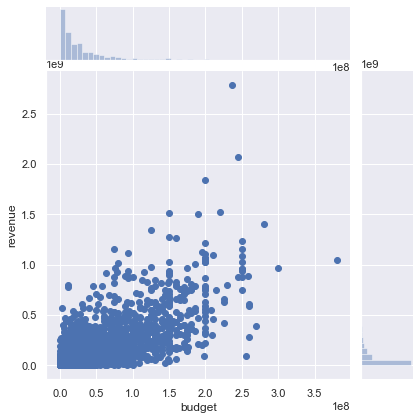

In [86]:
sns.jointplot(x="budget",y="revenue", data=df[df["return"].notnull()])
plt.show()

In [87]:
#find the highest grossing movie of all time
df["revenue"].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

In [88]:
df[df["revenue"].notnull()][["title","budget","revenue","return","year"]].sort_values("revenue",ascending=False).head(10)


,title,budget,revenue,return,year
14551,Avatar,237000000.0,2.787965e+09,11.763566,2009
26555,Star Wars: The Force Awakens,245000000.0,2.068224e+09,8.441729,2015
1639,Titanic,200000000.0,1.845034e+09,9.225171,1997
17818,The Avengers,220000000.0,1.519558e+09,6.907081,2012
25084,Jurassic World,150000000.0,1.513529e+09,10.090192,2015
28830,Furious 7,190000000.0,1.506249e+09,7.927628,2015
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,5.019299,2015
17437,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,10.736000,2011
22110,Frozen,150000000.0,1.274219e+09,8.494793,2013
42222,Beauty and the Beast,160000000.0,1.262886e+09,7.893040,2017


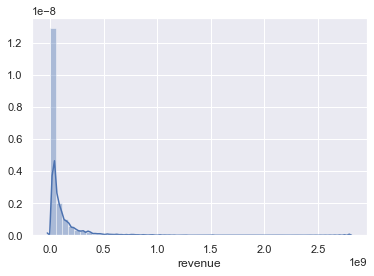

In [89]:
#check the distribution plot of revenue
sns.distplot(df[df["revenue"].notnull()]["revenue"])
plt.show()

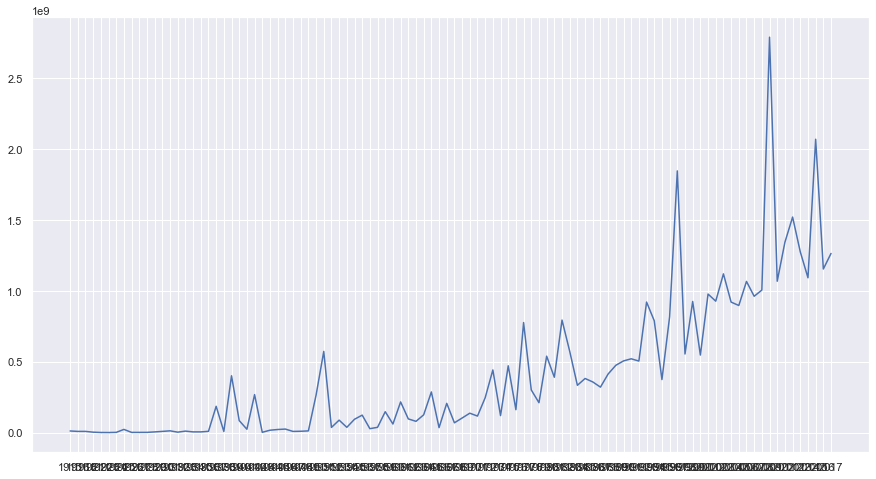

In [90]:
#plot the maximum revenue through the years.
plt.figure(figsize=(15,8))
df_revenue = df[(df["year"] != 'NaT') & (df["revenue"].notnull())].groupby("year")["revenue"].max()
plt.plot(df_revenue.index, df_revenue)  
plt.show()
    

In [91]:
df[(df["revenue"].notnull()) & (df["budget"]>5e6)][["title","budget","revenue","return","year"]].sort_values("return", ascending=False).head(10)

,title,budget,revenue,return,year
1065,E.T. the Extra-Terrestrial,10500000.0,792965326.0,75.520507,1982
256,Star Wars,11000000.0,775398007.0,70.490728,1977
1338,Jaws,7000000.0,470654000.0,67.236286,1975
1888,The Exorcist,8000000.0,441306145.0,55.163268,1973
352,Four Weddings and a Funeral,6000000.0,254700832.0,42.450139,1994
834,The Godfather,6000000.0,245066411.0,40.844402,1972
4492,Look Who's Talking,7500000.0,296000000.0,39.466667,1989
24258,Annabelle,6500000.0,255273813.0,39.272894,2014
1056,Dirty Dancing,6000000.0,213954274.0,35.659046,1987
1006,The Sound of Music,8200000.0,286214286.0,34.904181,1965


In [92]:
df[(df["revenue"].notnull()) & (df["budget"]>5e6) & (df["revenue"]>10000)][["title","budget","revenue","return","year"]].sort_values("return").head(10)

,title,budget,revenue,return,year
11159,Chaos,20000000.0,10289.0,0.000514,2005
19027,5 Days of War,20000000.0,17479.0,0.000874,2011
21034,Special Forces,10000000.0,10759.0,0.001076,2011
25732,Foodfight!,65000000.0,73706.0,0.001134,2012
38388,Term Life,16500000.0,21256.0,0.001288,2016
19505,Laurence Anyways,9500000.0,12250.0,0.001289,2012
12038,The Good Night,15000000.0,20380.0,0.001359,2007
3966,Cherry 2000,10000000.0,14000.0,0.001400,1987
22097,Twice Born,13000000.0,18295.0,0.001407,2012
5651,All The Queen's Men,15000000.0,23000.0,0.001533,2001


In [93]:
#genres

In [94]:
df["genres"] = df["genres"].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i["name"] for i in x] if isinstance(x,list) else [])


In [95]:
s = df.apply(lambda x: pd.Series(x["genres"]), axis =1).stack().reset_index(level=1, drop = True)
s.name = "genre"

In [96]:
gen_df = df.drop("genres", axis = 1).join(s)
gen_df["genre"].value_counts().shape[0] #there are 32 different genres

32

In [97]:
pop_gen = pd.DataFrame(gen_df["genre"].value_counts()).reset_index()
pop_gen.columns = ["genre", 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


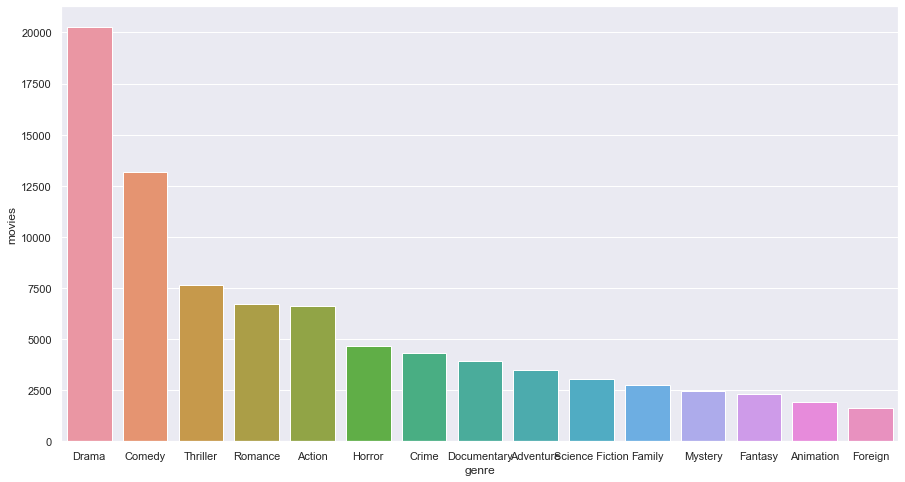

In [98]:
plt.figure(figsize = (15,8))
sns.barplot(x ="genre", y='movies', data = pop_gen.head(15))
plt.show()

In [99]:
#Plot a stacked bar chart
genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Adventure', 'Science Fiction', 'Mystery', 'Fantasy', 'Mystery', 'Animation']

In [100]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93548 entries, 0 to 45465
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  11162 non-null  object 
 1   budget                 21913 non-null  float64
 2   homepage               16556 non-null  object 
 3   id                     93548 non-null  object 
 4   original_language      93531 non-null  object 
 5   overview               93548 non-null  object 
 6   popularity             93527 non-null  float64
 7   poster_path            93083 non-null  object 
 8   production_companies   93548 non-null  object 
 9   production_countries   93548 non-null  object 
 10  release_date           93432 non-null  object 
 11  revenue                18518 non-null  float64
 12  runtime                93194 non-null  float64
 13  spoken_languages       93548 non-null  int64  
 14  status                 93402 non-null  object 
 15  ta

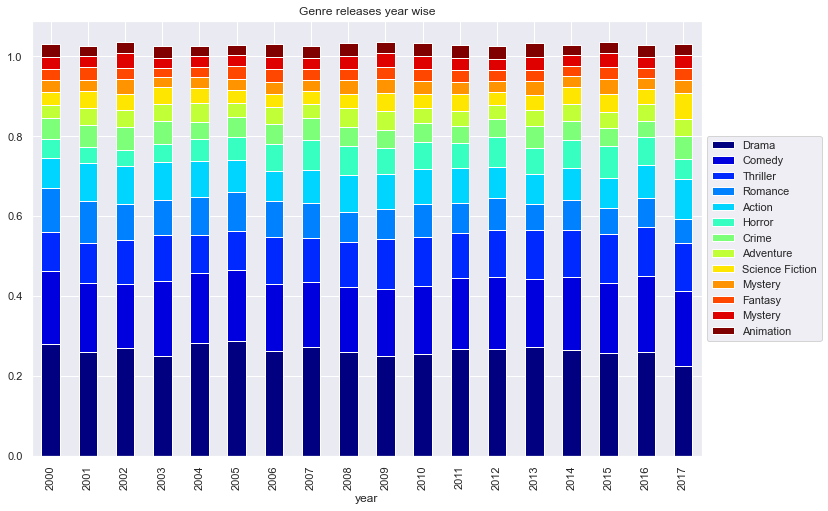

In [101]:
pop_movie_gen = gen_df[(gen_df['genre'].isin(genres)) & (gen_df['year'] >= '2000') & (gen_df['year'] <= '2017')]
pop_gen_ctab = pd.crosstab([pop_movie_gen['year']], [pop_movie_gen['genre']]).apply(lambda x: x/x.sum(), axis = 1)
pop_gen_ctab[genres].plot(kind = 'bar', stacked = True, colormap = 'jet', figsize = (12,8)).legend(loc = 'center left', bbox_to_anchor=(1,0.5))
plt.title("Genre releases year wise")
plt.show()

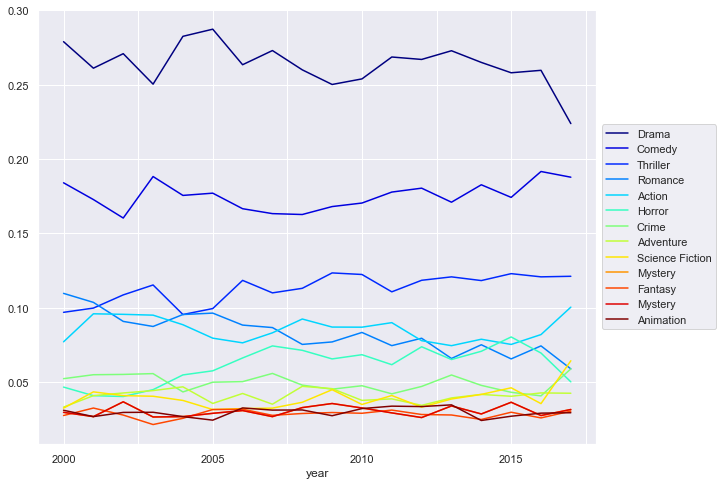

In [102]:
pop_gen_ctab[genres].plot(kind = 'line', stacked = False, colormap = 'jet', figsize = (10,8)).legend(loc = 'center left', bbox_to_anchor=(1,0.5))
plt.show()

# Cast And Crew

In [103]:
c_df= pd.read_csv("credits.csv")
c_df.head(10)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
5,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...",949
6,"[{'cast_id': 1, 'character': 'Linus Larrabee',...","[{'credit_id': '52fe44959251416c75039da9', 'de...",11860
7,"[{'cast_id': 2, 'character': 'Tom Sawyer', 'cr...","[{'credit_id': '52fe46bdc3a36847f810f797', 'de...",45325
8,"[{'cast_id': 1, 'character': 'Darren Francis T...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de...",9091
9,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '52fe426ec3a36847f801e14b', 'de...",710


In [104]:
#getting the ID's and converting it into the integer 

def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [107]:
df['id'] = df['id'].apply(convert_int)

In [108]:
df[df['id'].isnull()]

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,status,tagline,title,video,vote_average,vote_count,return,year,day,month
19730,0.065736,NaN,"[Carousel Productions, Vision View Entertainme...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",NaN,104.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Midni...,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaT,NaN,NaN
29503,1.931659,NaN,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,68.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Mardo...,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaT,NaN,NaN
35587,2.185485,NaN,"[Odyssey Media, Pulser Productions, Rogue Stat...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",NaN,82.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Avala...,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [109]:
df = df.drop([19730,29503,35587])
df

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,status,tagline,title,video,vote_average,vote_count,return,year,day,month
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,[Pixar Animation Studios],...,Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995,NaN,oct
1,NaN,65000000.0,"[Adventure, Fantasy, Family]",NaN,8844.0,en,When siblings Judy and Peter discover an encha...,17.015539,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[TriStar Pictures, Teitler Film, Interscope Co...",...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995,NaN,dec
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[Romance, Comedy]",NaN,15602.0,en,A family wedding reignites the ancient feud be...,11.712900,<img src='http://image.tmdb.org/t/p/w185//6ksm...,"[Warner Bros., Lancaster Gate]",...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995,NaN,dec
3,NaN,16000000.0,"[Comedy, Drama, Romance]",NaN,31357.0,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,<img src='http://image.tmdb.org/t/p/w185//16XO...,[Twentieth Century Fox Film Corporation],...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.090760,1995,NaN,dec
4,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,[Comedy],NaN,11862.0,en,Just when George Banks has recovered from his ...,8.387519,<img src='http://image.tmdb.org/t/p/w185//e64s...,"[Sandollar Productions, Touchstone Pictures]",...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,1995,NaN,feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,NaN,"[Drama, Family]",http://www.imdb.com/title/tt6209470/,439050.0,fa,Rising and falling between a man and woman.,0.072051,<img src='http://image.tmdb.org/t/p/w185//jlds...,[],...,Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaN,NaT,NaN,NaN
45462,NaN,NaN,[Drama],NaN,111109.0,tl,An artist struggles to finish his work while a...,0.178241,<img src='http://image.tmdb.org/t/p/w185//xZkm...,[Sine Olivia],...,Released,NaN,Century of Birthing,False,9.0,3.0,NaN,2011,NaN,nov
45463,NaN,NaN,"[Action, Drama, Thriller]",NaN,67758.0,en,"When one of her hits goes wrong, a professiona...",0.903007,<img src='http://image.tmdb.org/t/p/w185//d5bX...,[American World Pictures],...,Released,A deadly game of wits.,Betrayal,False,3.8,6.0,NaN,2003,NaN,aug
45464,NaN,NaN,[],NaN,227506.0,en,"In a small town live two brothers, one a minis...",0.003503,<img src='http://image.tmdb.org/t/p/w185//aorB...,[Yermoliev],...,Released,NaN,Satan Triumphant,False,0.0,0.0,NaN,1917,NaN,oct


In [110]:
df['id'] = df['id'].astype(int)

In [112]:
df=df.merge(c_df, on='id')
df.shape

(45538, 27)

In [113]:
df['crew']=df['crew'].apply(ast.literal_eval)
df['cast']=df['cast'].apply(ast.literal_eval)

In [114]:
df['crew_size']=df['crew'].apply(lambda x: len(x))
df['cast_size']=df['cast'].apply(lambda x: len(x))

In [116]:
df['cast']=df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance (x,list) else [])

In [119]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [120]:
df['director']=df['crew'].apply(get_director)

In [122]:
s = df.apply(lambda x: pd.Series(x['cast']), axis = 1).stack().reset_index(level = 1, drop = True)
s.name = 'actor'
cast_df = df.drop('cast', axis = 1).join(s)

In [123]:
#actors and directors with highest revenue
sns.set_style('whitegrid')
plt.title('Highest grossing actors with revenue')
cast_df.groupby('actor')['revenue'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

ValueError: 
Je$$ica
  ^
Expected end of text, found '$'  (at char 2), (line:1, col:3)

<Figure size 432x288 with 1 Axes>

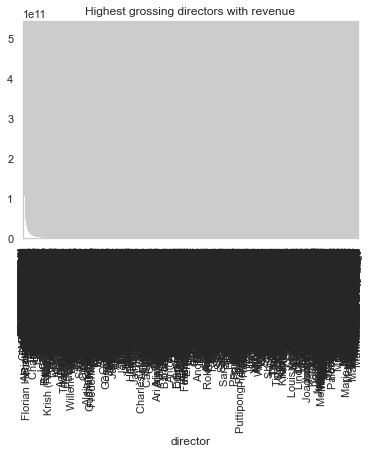

In [124]:
#actors and directors with highest revenue
sns.set_style('whitegrid')
plt.title('Highest grossing directors with revenue')
cast_df.groupby('director')['revenue'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.show()